In [28]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
from random import choice

In [29]:
from differential_evolution import differential_evolution
from AuxFunctions import show_image, load_image, add_circle, show_fitness, filename_from_path

# Approximating Images with circles using Differential Evolution Algorithms


Rafael Andrade Ruiz Capetillo | José Luis Lobera del Castillo

#### Preprocesing the image to approximate before the algorithm

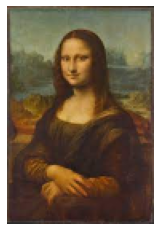

Target Shape: (137, 92, 3)


In [49]:
path = '../Images/monalisa.jpeg'
target = load_image(path, size=(92,137))
show_image(target)
print('Target Shape:', target.shape)

Creating the image that will be the canvas for the circles to plot

In [43]:
phenotype = np.zeros(shape=target.shape)
phenotype.fill(255)

#### Differential Algorithms Input Functions

Objective Function for the algorithm to score the genes

In [44]:
def objective_function(P):
    global target
    global phenotype
    
    new_phenotype = add_circle(phenotype, P)

    max_error = (np.square((1 - (target >= 127)) * 255 - target)).mean(axis=None)
    fit = (np.square(new_phenotype - target)).mean(axis=None)
    fit = (max_error - fit) / max_error
        
    return 1 - fit

Callback function that will be called when a elite gene is found

In [45]:
def callback(P, g):
    global phenotype
    phenotype = add_circle(phenotype, P)
    #show_image(phenotype)

Bounds of the genotype genes (X and Y position, r Radius, R,G,B intensity and a Alpha)

In [46]:
bounds = [
    [0,1],                      # 1 X position
    [0,1],                      # 2 Y position
    [0,1],                      # 3 Radius
    [0,1],                      # 4 Red
    [0,1],                      # 5 Green
    [0,1],                      # 6 Blue
    [0,1]                       # 7 Alpha
]

Auxiliar function to call the  algorithm and plot the results

In [47]:
def approximate_image(func, bounds, args=(), popsize=100, niter=1000, callback=None, iterations=None, save=False, path=None):

    if iterations == None:
        phenotype.fill(255)
        differential_evolution(func, bounds, args, popsize, niter, callback=callback)
        img_res = np.copy(phenotype)
        show_fitness(target, [[img_res, 1000]], save=save, path=path)
        return [img_res, 1000]
    else:
        outputs = []
        for iter in iterations:
            phenotype.fill(255)
            differential_evolution(func, bounds, args, popsize, niter=iter, callback=callback)
            outputs.append([np.copy(phenotype), iter])
        
        show_fitness(target, outputs, save=save, path=path)
        return outputs

Example of function call with and image and 4 different iteration numbers

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


DIFFERENTIAL EVOLUTION, 100000 GENS, 100 POPULATION, 7 GENES
GEN 99999, FIT 0.00289931


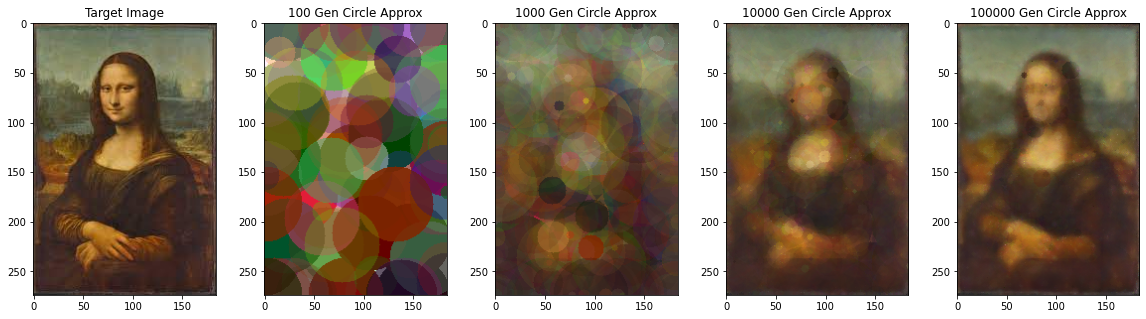

In [48]:
res = approximate_image(
        func=objective_function,
        bounds=bounds,
        callback=callback,
        #popsize=1,
        iterations=[100, 1000, 10000, 100000],
        save=True,
        path=path
)